# Demo: LLM Agent with Tavily & LangGraph

This notebook demonstrates the usage of your LangGraph pipeline that integrates:
- ✅ Query parsing (subquery generation)
- ✅ Tavily search via Async API
- ✅ Cohere LLM with streaming response
- ✅ Pretty CLI output

In [1]:
%reload_ext autoreload
%autoreload 2

import nest_asyncio
from agent.langraph_pipeline import TavilyRAGPipeline

/Users/roni/tavilyHW/venv/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(



## ⚙️ Setup

Make sure the following environment variables are set:

```bash
export COHERE_API_KEY=your_cohere_key
export TAVILY_API_KEY=your_tavily_key
```
and install the required packages:
```bash
pip install -r requirements.txt
```

In [2]:
from dotenv import load_dotenv
load_dotenv()
nest_asyncio.apply()

LangGraph Structure:


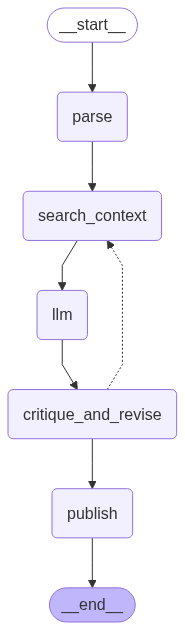

In [3]:
pipeline = TavilyRAGPipeline(show_subqueries=True)
pipeline.visualize()

In [4]:
async def run(queries, debug=False):
    config={"thread_id": 1}
    # To change the memory scope to be per query, uncomment the first line in the loop below.
    for q in queries:
        # rconfig={"thread_id": f"run-{hash(q)}"}
        await pipeline.get_graph().ainvoke({"query": q}, config=config, debug=debug)

In [9]:
# Define categorized test queries
test_cases = {
    "Simple Queries": [
        "What is LangGraph?",
    ],
    "Queries for Subquerying": [
        "What is the capital of France?",
        "What are the features of LangGraph and who uses it?",
        "Why do we drink milk, coffee, and tea?",
    ],
    "Queries for Checkpointing": [
        "Where is France located?",
        "Where is Germany located?",
        "Where is France located?",
    ],
    "Stress Testing Queries": [
        "Tell me about LangGraph's benefits, use cases, integration with LLMs, industry adoption, competitors, and deployment options."
    ],
    "Robustness Queries": [
        "Blargle wib wib ahsheli LangGraph elephant?"
    ],
    "Short Keyword Queries": [
        "LangGraph"
    ]
}

In [11]:
for label, queries in test_cases.items():
    print(f"\n=== Running: {label} ===")
    if label == "Queries for Subquerying":
        debug = True
    else:
        debug = False
    await run(queries, debug=debug)


=== Running: Simple Queries ===
================================= Human Query ==================================

What is LangGraph?

================================= AI Response ==================================
LangGraph is a library or framework created by LangChain. It is designed to aid
in building, deploying, and managing complex generative AI agent workflows.
LangGraph utilizes graph-based architectures to establish relationships between
various components of AI workflows, resulting in enhanced decision-making.
Essentially, it simplifies the development of intricate LLM applications by
offering a structured framework for managing an AI agent's state and
coordinating its interactions with other agents.


=== Running: Queries for Subquerying ===
[values] {'query': 'What is the capital of France?', 'subqueries': ['What is LangGraph?'], 'combined_context': "LangGraph Tutorial: What Is LangGraph and How to Use It?:\nLangGraph is a library within the LangChain ecosystem that provid

Exception: [Error calling Cohere: status_code: 429, body: {'id': '473e6da3-26b1-4271-be1f-647b7849cee5', 'message': "You are using a Trial key, which is limited to 10 API calls / minute. You can continue to use the Trial key for free or upgrade to a Production key with higher rate limits at 'https://dashboard.cohere.com/api-keys'. Contact us on 'https://discord.gg/XW44jPfYJu' or email us at support@cohere.com with any questions"}]